In [1]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

iris = datasets.load_iris()
X = iris.data
y = iris["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

C=[.01,.05,.075,.1,.5,1,10]
accuracy=[]
svm = SVC(kernel='linear', C=1, random_state=0)
svm.fit(X_train_std, y_train)

#choose C by computing accuaracy with testing data
for i in C:
    svm = SVC(kernel='linear', C=i, random_state=0)
    svm.fit(X_train_std, y_train)
    pred=svm.predict(X_test_std)
    accuracy.append(sum(pred==y_test)/len(y_test))


pd.DataFrame({"C":C,
             "accuracy":accuracy})


,C,accuracy
0,0.010,0.711111
1,0.050,0.955556
2,0.075,0.977778
3,0.100,0.977778
4,0.500,0.977778
5,1.000,0.977778
6,10.000,0.977778


In [2]:
# kernel method
svm = SVC(kernel='rbf', random_state=0, gamma=1, C=1)
svm.fit(X_train_std, y_train)
pred=svm.predict(X_test_std)
accuracy=sum(pred==y_test)/len(y_test)
accuracy

0.9777777777777777

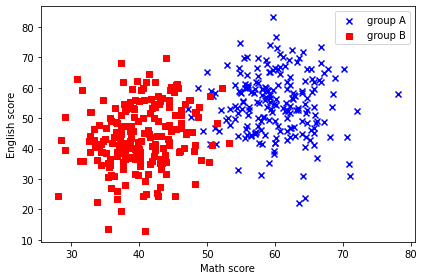

In [3]:
#Suppse there are 2 groups and each group has 200 students. They took a math and english test.
# Students in the group A tend to score better in both math and english than students in the group B
sizeA=200 #number of students in the group A
sizeB=200 #number of students in the group A

MathA=np.random.normal(60,5,sizeA) #generate math scores for the group A 
EnglishA=np.random.normal(55,10,sizeA) #generate English scores for the group A
MathB=np.random.normal(40,5,sizeB) #generate math scores for the group B
EnglishB=np.random.normal(45,10,sizeB) #generate English scores for the group B

y=[0]*sizeA+[1]*sizeB # 0 indicates the group A, 1 indicates the group B
A=np.vstack((MathA, EnglishA)).T
B=np.vstack((MathB, EnglishB)).T
X= np.concatenate((A,B))
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0) #30% of the observations is used as the test data

sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

plt.scatter(A[:,0],
            A[:,1],
            c='b', marker='x',
            label='group A')
plt.scatter(B[:,0],
            B[:,1],
            c='r',marker='s',
            label='group B')

plt.legend(loc='best')
plt.xlabel('Math score')
plt.ylabel('English score')
plt.tight_layout()
plt.show()


In [4]:

C=[.1,.5,1,5,10,50,100] #parameter for SVM
accuracy=[] #store the accuracies for each C.

svm = SVC(kernel='linear', C=1, random_state=0)
svm.fit(X_train_std, y_train)

#choose C by computing accuaracy with testing data
for i in C:
    svm = SVC(kernel='linear', C=i, random_state=0)
    svm.fit(X_train_std, y_train)
    pred=svm.predict(X_test_std)
    accuracy.append(sum(pred==y_test)/len(y_test))
    
pd.DataFrame({"C":C,
             "accuracy":accuracy})


,C,accuracy
0,0.1,0.975000
1,0.5,0.966667
2,1.0,0.966667
3,5.0,0.966667
4,10.0,0.958333
5,50.0,0.966667
6,100.0,0.966667
7,100000.0,0.966667


In [5]:
# kernel method
svm = SVC(kernel='rbf', random_state=0, gamma=1, C=1)
svm.fit(X_train_std, y_train)
pred=svm.predict(X_test_std)
accuracy=sum(pred==y_test)/len(y_test)
accuracy

0.9666666666666667

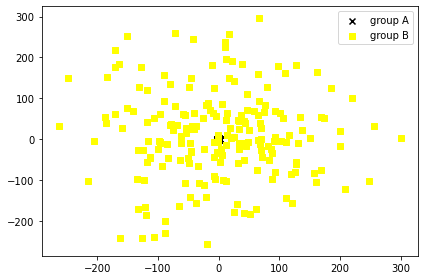

In [6]:
#what if the observations are not linearlly separatable
XA=np.random.normal(0,1,sizeA)
YA=np.random.normal(0,1,sizeA)
XB=np.random.normal(0,1,sizeB)*100
YB=np.random.normal(0,1,sizeB)*100
A=np.vstack((XA, YA)).T
B=np.vstack((XB, YB)).T
X= np.concatenate((A,B))
y=[0]*sizeA+[1]*sizeB
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)


plt.scatter(A[:,0],
            A[:,1],
            c='black', marker='x',
            label='group A')
plt.scatter(B[:,0],
            B[:,1],
            c='yellow',marker='s',
            label='group B')

plt.legend(loc='best')
plt.tight_layout()
plt.show()


In [7]:
C=[.1,1,10,100,1000]
accuracy=[]
svm = SVC(kernel='linear', C=1, random_state=0)
svm.fit(X_train_std, y_train)

#choose C by computing accuaracy with testing data
for i in C:
    svm = SVC(kernel='linear', C=i, random_state=0)
    svm.fit(X_train_std, y_train)
    pred=svm.predict(X_test_std)
    accuracy.append(sum(pred==y_test)/len(y_test))

pd.DataFrame({"C":C,
             "accuracy":accuracy})
# as expected, linear is not good

,C,accuracy
0,0.1,0.616667
1,1.0,0.616667
2,10.0,0.616667
3,100.0,0.616667
4,1000.0,0.616667


In [8]:
# kernel method
svm = SVC(kernel='rbf', random_state=0, gamma=1, C=1)
svm.fit(X_train_std, y_train)
pred=svm.predict(X_test_std)
accuracy=sum(pred==y_test)/len(y_test)
accuracy

0.9583333333333334